**Importaciones:**

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [26]:
# Extraer zip de dataset/dataset.zip
import zipfile
with zipfile.ZipFile("dataset/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

**Cargar y preparar los datos**

In [20]:
# Cargar los datos con el delimitador correcto
train_data = pd.read_csv('dataset/train.csv', delimiter=';')
test_data = pd.read_csv('dataset/test.csv', delimiter=';')

# Separar características (X) y etiquetas (y)
X_train = train_data.iloc[:, :-1].values  # 784 columnas de píxeles
y_train = train_data.iloc[:, -1].values   # La última columna (dígito)
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Datos cargados y normalizados:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")

Datos cargados y normalizados:
Forma de X_train: (59999, 784)
Forma de y_train: (59999,)


**Definir y entrenar el modelo - Configuración 1**


Entrenando configuración 1: {'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.001}



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9764976497649765
Confusion Matrix:
[[ 971    1    0    0    1    1    1    1    1    3]
 [   0 1128    2    0    0    1    1    1    1    1]
 [   5    4  985    4    3    3    2   12   14    0]
 [   0    0    4  986    0    7    0    6    1    6]
 [   1    2    1    0  965    0    6    1    0    6]
 [   3    2    0    9    1  869    2    1    2    3]
 [   6    2    1    0    5    3  938    0    3    0]
 [   1    6    7    3    4    0    0  996    0   10]
 [   0    1    3    6    5    3    1    4  947    4]
 [   1    2    0    3   11    9    0    4    0  979]]


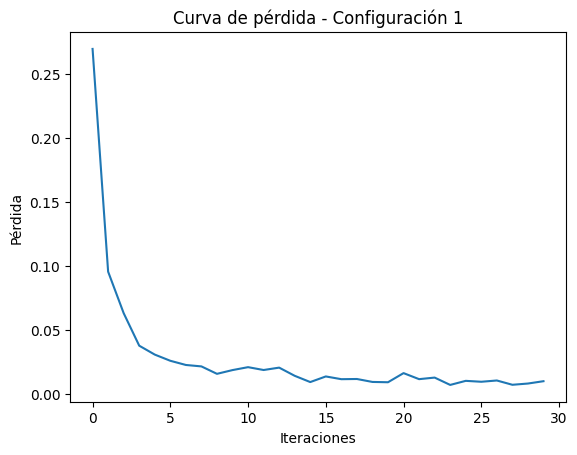

In [21]:
# Configuración 1: Red más grande (256, 128, 64) con learning_rate_init=0.001
config_1 = {"hidden_layer_sizes": (256, 128, 64), "learning_rate_init": 0.001}

print(f"\nEntrenando configuración 1: {config_1}\n")
mlp_1 = MLPClassifier(hidden_layer_sizes=config_1["hidden_layer_sizes"],
                      activation='relu',
                      solver='adam',
                      learning_rate_init=config_1["learning_rate_init"],
                      max_iter=30,
                      random_state=42)

# Entrenar el modelo
mlp_1.fit(X_train, y_train)

# Evaluar el modelo
y_pred_1 = mlp_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

print(f"Accuracy: {accuracy_1}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_1)}")

# Graficar curva de pérdida
plt.figure()
plt.plot(mlp_1.loss_curve_)
plt.title("Curva de pérdida - Configuración 1")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()


Entrenando configuración 2: {'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001}



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9698969896989699
Confusion Matrix:
[[ 962    1    1    1    2    2    7    2    1    1]
 [   0 1120    5    1    0    2    2    1    4    0]
 [   4    5  990    5    1    1    6    4   16    0]
 [   1    0    9  979    0   11    0    3    4    3]
 [   0    1    7    0  953    1    3    2    3   12]
 [   2    1    0    7    2  874    2    1    2    1]
 [   2    2    2    1   10   10  927    0    4    0]
 [   1    6   12    5    2    1    0  984    7    9]
 [   2    0    2    5    6   13    2    3  936    5]
 [   1    2    0    4   10    8    0    7    4  973]]


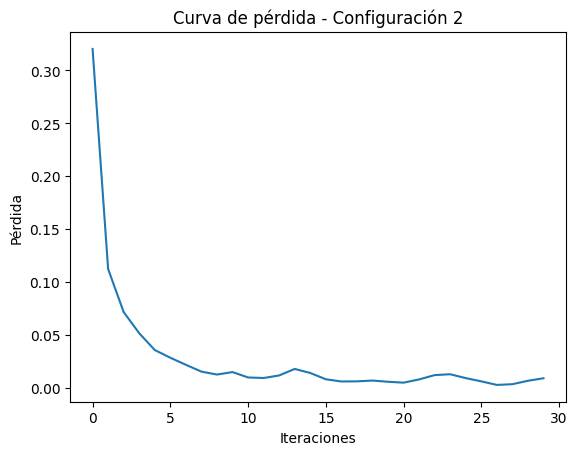

In [22]:
# Configuración 2: Red inicial (128, 64) con learning_rate_init=0.001
config_2 = {"hidden_layer_sizes": (128, 64), "learning_rate_init": 0.001}

print(f"\nEntrenando configuración 2: {config_2}\n")
mlp_2 = MLPClassifier(hidden_layer_sizes=config_2["hidden_layer_sizes"],
                      activation='relu',
                      solver='adam',
                      learning_rate_init=config_2["learning_rate_init"],
                      max_iter=30,
                      random_state=42)

# Entrenar el modelo
mlp_2.fit(X_train, y_train)

# Evaluar el modelo
y_pred_2 = mlp_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"Accuracy: {accuracy_2}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")

# Graficar curva de pérdida
plt.figure()
plt.plot(mlp_2.loss_curve_)
plt.title("Curva de pérdida - Configuración 2")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()

**Definir y entrenar el modelo - Configuración 3**


Entrenando configuración 3: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01}

Accuracy: 0.9595959595959596
Confusion Matrix:
[[ 966    0    0    0    1    0    5    1    7    0]
 [   0 1116    2    2    0    1    8    1    4    1]
 [   5   15  956   10    5    1    3    8   28    1]
 [   1    0    1  980    0   10    0    3   13    2]
 [   0    0    1    0  940    1    9    1   20   10]
 [   6    0    1    8    0  861    3    1   11    1]
 [   5    2    1    1    2    9  924    3   10    1]
 [   0   13   10    4    1    1    0  976   13    9]
 [   2    1    1    8    3    7    1    5  943    3]
 [   2    3    0   10   27    8    0    4   22  933]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


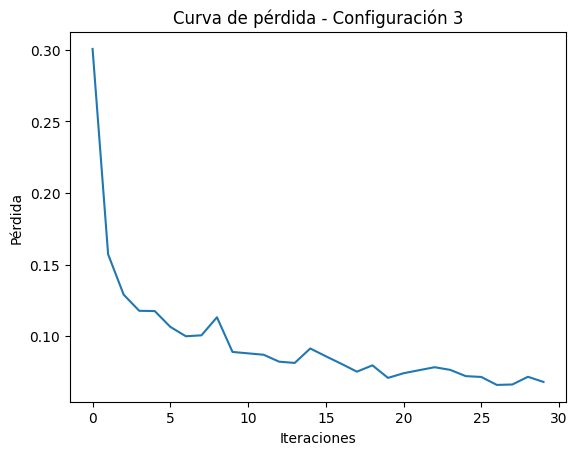

In [23]:
# Configuración 3: Red más pequeña (64, 32) con learning_rate_init=0.01
config_3 = {"hidden_layer_sizes": (64, 32), "learning_rate_init": 0.01}

print(f"\nEntrenando configuración 3: {config_3}\n")
mlp_3 = MLPClassifier(hidden_layer_sizes=config_3["hidden_layer_sizes"],
                      activation='relu',
                      solver='adam',
                      learning_rate_init=config_3["learning_rate_init"],
                      max_iter=30,
                      random_state=42)

# Entrenar el modelo
mlp_3.fit(X_train, y_train)

# Evaluar el modelo
y_pred_3 = mlp_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Accuracy: {accuracy_3}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_3)}")

# Graficar curva de pérdida
plt.figure()
plt.plot(mlp_3.loss_curve_)
plt.title("Curva de pérdida - Configuración 3")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()


**Comparación de resultados**

In [24]:
# Resumen de los resultados
print("\nResumen de configuraciones y resultados:")
print(f"Configuración 1 (256, 128, 64, lr=0.001): Accuracy = {accuracy_1}")
print(f"Configuración 2 (128, 64, lr=0.001): Accuracy = {accuracy_2}")
print(f"Configuración 3 (64, 32, lr=0.01): Accuracy = {accuracy_3}")


Resumen de configuraciones y resultados:
Configuración 1 (256, 128, 64, lr=0.001): Accuracy = 0.9764976497649765
Configuración 2 (128, 64, lr=0.001): Accuracy = 0.9698969896989699
Configuración 3 (64, 32, lr=0.01): Accuracy = 0.9595959595959596
